# Exploración de los datos



El primer paso para la construcción de un modelo, es la exploración de los datos, esto significa usar estadísticas y gráficos para comprender qué contiene tu conjunto de datos, encontrar patrones, detectar anomalías (valores atípicos) y ver cómo se relacionan las variables.

Es el proceso de arreglar los problemas que encontraste. Si viste piezas rotas (datos corruptos), piezas que no pertenecen a ese set (datos irrelevantes), o espacios vacíos donde debería haber una pieza (datos faltantes), aquí es donde lo solucionas. Esto incluye manejar valores nulos, eliminar duplicados, corregir errores de formato.

Precisión del Análisis: Tus cálculos, reportes y conclusiones solo serán correctos si se basan en datos correctos. Datos sucios llevan a resultados equivocados.

Toma de Decisiones Confiable: Las empresas y los científicos toman decisiones importantes basadas en análisis de datos. Si el análisis es incorrecto debido a datos sucios, las decisiones (de negocio, médicas, etc.) serán malas y costosas.

Eficiencia de los Modelos (IA/Machine Learning): Los modelos de inteligencia artificial son muy sensibles a la calidad de los datos. Datos limpios y bien formateados permiten que los modelos entrenen más rápido, funcionen sin errores y hagan predicciones mucho más precisas.

Evitar Sesgos (Bias): Datos incompletos o mal registrados pueden introducir sesgos en tus resultados. Por ejemplo, si solo tienes datos de un grupo demográfico, tus conclusiones no se aplicarán a todos, llevando a resultados injustos o inexactos.

In [8]:
import pandas as pd # libreria para manejo de datos
import matplotlib.pyplot as plt # libreria para graficos
import numpy as np # libreria para calculos numericos
import seaborn as sns # libreria para graficos estadisticos


print("Librerias importadas correctamente")


Librerias importadas correctamente


In [9]:
# Leer datos desde un archivo CSV

diatomeas=pd.read_csv('Dataset/01_DiatomInventories_GTstudentproject_B.csv')
sitios=pd.read_csv('Dataset/02_InfoSites_GTstudentproject_B.csv')
test=pd.read_csv('Dataset/03_IBD_GTstudentproject_test.csv')
train=pd.read_csv('Dataset/03_IBD_GTstudentproject_train.csv')
pressure=pd.read_csv('Dataset/04_PressureStatus_GTstudentproject_B.csv')
parametros=pd.read_csv('Dataset/06_ListEnvParam_GNNprojectGT_B.csv') 
taxones=pd.read_csv('Dataset/07_TaxaCode_GTstudentproject_B.csv')
print("Datos cargados correctamente")

Datos cargados correctamente


In [ ]:
# Una vez cargados los datos, podemos inspeccionarlos
print(diatomeas.info())
print(sitios.info())
print(test.info())
print(train.info())
print(pressure.info())
print(parametros.info())
print(taxones.info())

In [ ]:
#muestra los primeros 5
diatomeas.head()

,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,Achnanthes aapajaervensis,Achaa01,S04094200_20120910,S04094200,2012-09-10,8,420,19.047619
1,Achnanthes aapajaervensis,Achaa01,S05155300_20100728,S05155300,2010-07-28,1,404,2.475248
2,Achnanthes affinis,Achaf01,S02018780_20070808,S02018780,2007-08-08,1,400,2.500000
3,Achnanthes affinis,Achaf01,S02022675_20090803,S02022675,2009-08-03,2,400,5.000000
4,Achnanthes affinis,Achaf01,S02094920_20120726,S02094920,2012-07-26,1,400,2.500000


## Una vez que exploramos los dataframe (conjuntos de datos) principales, lo más importe es elegir los datos más indispensables para la predicción 

¿Qué es el IBD?
Esto es para el caso de la calidad del Agua, ya que para cada problema existen variables para la predicción. 

El IBD.

Es una calificación numérica (de 0 a 20) que te dice qué tan "saludable" o "limpia" es el agua de un río.

    Bio-indicador: Significa que usa seres vivos (las diatomeas) para medir la calidad del ambiente.

    La Lógica: Ciertas especies de diatomeas son muy sensibles a la contaminación (mueren o desaparecen si el agua está sucia), mientras que otras son muy tolerantes (prosperan en agua contaminada).

    Cómo se Calcula: Se basa directamente en el Archivo 01 (Inventarios). Un experto toma la lista de especies encontradas y sus abundancias, aplica una fórmula matemática, y obtiene un solo número.

        Un puntaje de 20 significa una calidad ecológica máxima (agua muy limpia).

        Un puntaje de 0 significa una calidad ecológica pésima (agua muy contaminada).

Elegir los tres primeros archivos es una estrategia excelente para realizar un Análisis Exploratorio de Datos (EDA). El objetivo es entender cómo se conectan la geografía, la biología y la calidad del agua.

Aquí está el rol de cada archivo en ese análisis:

    Archivo 03 (df_ibd): El Punto de Partida (El "Qué")

    Archivo 02 (df_sites): El Contexto Geográfico (El "Dónde")

    Archivo 01 (df_inventories): La Explicación Biológica (El "Por Qué")


In [ ]:
# Primero exploramos nuestro target que es lo que buscamos predecir
train.head(10)

,SamplingOperations_code,IBD,IBD_EQR,IBD_EQR_Status
0,S04319000_20130724,5.2,0.256098,Bad
1,S06172100_20080716,6.1,0.298246,Bad
2,S03255920_20120802,3.7,0.157895,Bad
3,S04064720_20150710,4.9,0.228070,Bad
4,S05001500_20080726,5.3,0.251462,Bad
5,S04417048_20220803,13.0,0.701754,Moderate
6,S04026066_20220816,11.2,0.596491,Moderate
7,S02042348_20210810,13.5,0.730994,Moderate
8,S04454025_20200629,13.0,0.571429,Moderate
9,S04023400_20150605,10.3,0.543860,Poor


In [25]:
train.describe()

,IBD,IBD_EQR
count,43783.000000,43783.000000
mean,15.370151,0.803836
std,2.802306,0.151688
min,1.000000,0.000000
25%,13.700000,0.719298
50%,15.200000,0.818713
75%,17.200000,0.914286
max,20.000000,1.000000


In [ ]:
train.info

<bound method DataFrame.info of       SamplingOperations_code   IBD   IBD_EQR IBD_EQR_Status
0          S04319000_20130724   5.2  0.256098            Bad
1          S06172100_20080716   6.1  0.298246            Bad
2          S03255920_20120802   3.7  0.157895            Bad
3          S04064720_20150710   4.9  0.228070            Bad
4          S05001500_20080726   5.3  0.251462            Bad
...                       ...   ...       ...            ...
43778      S06165700_20230628   6.8  0.339181           Poor
43779      S06440770_20230524  15.3  0.836257           Good
43780      S06710030_20230627  18.4  1.000000           High
43781      S06036970_20230628  14.5  0.678571       Moderate
43782      S06132870_20230830  19.5  0.966667           High

[43783 rows x 4 columns]>

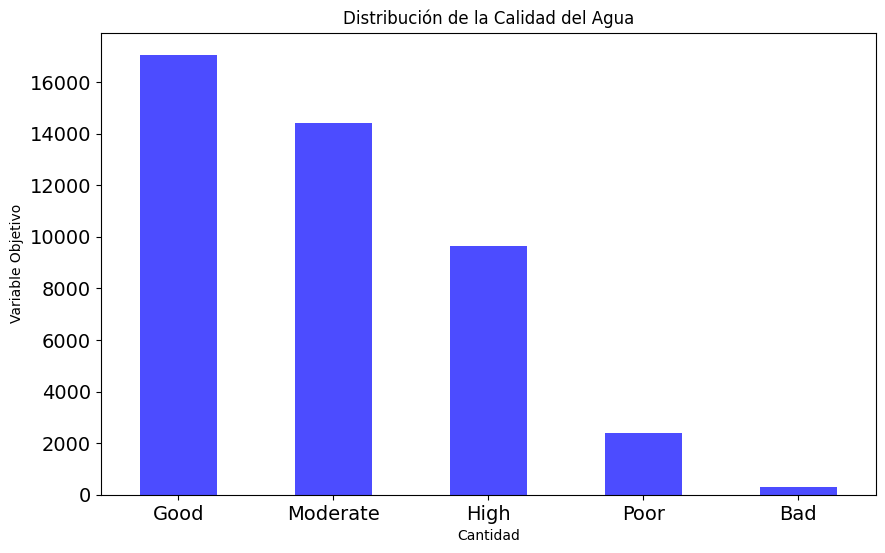

In [40]:
# En este caso tenemos dos variables objetivo posibles: IBD_EQR_Score (valor numérico) e IBD_EQR_Status (categoría cualitativa).
# Podemos explorar ambas para entender su distribución.

# .plot nos permiste elegir el tipo de gráfico que queremos
# bar = barras, 
# hist = histograma, 
# box = diagrama de caja, 
# pie = pastel, 
# scatter = dispersión
# line = línea  (es el default)

train['IBD_EQR_Status'].value_counts().plot(
    kind='bar',            # Tipo: Barras verticales
    color='blue',        # Color: Morado
    alpha=0.7,             # Transparencia: Un poco transparente
    figsize=(10, 6),       # Tamaño: Ancho y no muy alto
    title='Distribución de la Calidad del Agua', # Título
    rot=0,                 # Rotación: Nombres derechos (no inclinados)
    grid=False,             # Cuadrícula: Sí (líneas de fondo)
    fontsize=14            # Letra: Grande
)

plt.xlabel('Cantidad')      # Etiqueta X
plt.ylabel('Variable Objetivo')     # Etiqueta Y
plt.show()

# Con esta primera exploracion, podemos darnos cuenta del desbalance de clases en nuestra variable objetivo.

## Para verificar la variable objetivo usaremos la grafica de bigotes
### 📦 La Caja 

La caja te muestra dónde se agrupa la mitad central de tus datos. Está definida por tres líneas:

* **Línea Inferior de la Caja (Q1 - Cuartil 1):** El 25% de todos tus datos está por debajo de esta línea.
* **Línea Central de la Caja (Mediana o Q2):** Este es el valor central exacto de tus datos. El 50% de los datos está por encima de ella y el 50% por debajo.
* **Línea Superior de la Caja (Q3 - Cuartil 3):** El 75% de todos tus datos está por debajo de esta línea.

> **En resumen:** La altura de la caja (llamada Rango Intercuartílico o IQR) te dice qué tan "disperso" o "compacto" es el 50% principal de tus datos. Una caja alta significa mucha variación; una caja corta significa que los datos son muy similares.

---

### 〰️ Los Bigotes (El Rango "Normal")

Los bigotes son las líneas que se extienden desde la caja. Muestran el resto del rango de datos que se considera "normal" o esperado.

* **Bigote Inferior:** Se extiende desde Q1 (la parte baja de la caja) hasta el valor *mínimo* que no se considera un "punto atípico".
* **Bigote Superior:** Se extiende desde Q3 (la parte alta de la caja) hasta el valor *máximo* que no se considera un "punto atípico".

---

### ⚫ Los Puntos (Valores Atípicos)

**Estos son los datos que "no encajan" con el resto del grupo.**

* **Qué son:** Son puntos de datos individuales que están *fuera* del rango de los bigotes (generalmente, más de 1.5 veces la altura de la caja lejos de la caja).
* **Qué significan:** Indican anomalías, excepciones, o posibles errores. En tu caso, un punto podría ser un sitio que obtuvo un puntaje numérico muy bajo (ej. `IBD = 8`) pero que aun así fue clasificado en una categoría alta (ej. `Status = 'Good'`).

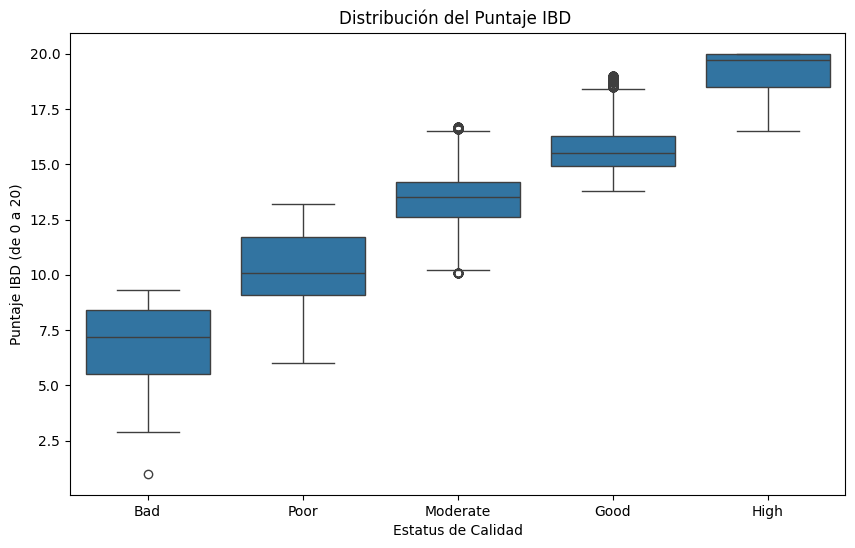

In [ ]:

#Gráfica de bigotes del estatus y la varibale IBD
custom_order = ['Bad', 'Poor', 'Moderate', 'Good','High' ]

plt.figure(figsize=(10, 6))
# sns llama a libreria seaborn
# boxplot crea un diagrama de caja 
sns.boxplot(
    x='IBD_EQR_Status',
    y='IBD',            
    data=train,
    order=custom_order 
)

plt.title('Distribución del Puntaje IBD ')
plt.ylabel('Puntaje IBD (de 0 a 20)')
plt.xlabel('Estatus de Calidad')
plt.show()

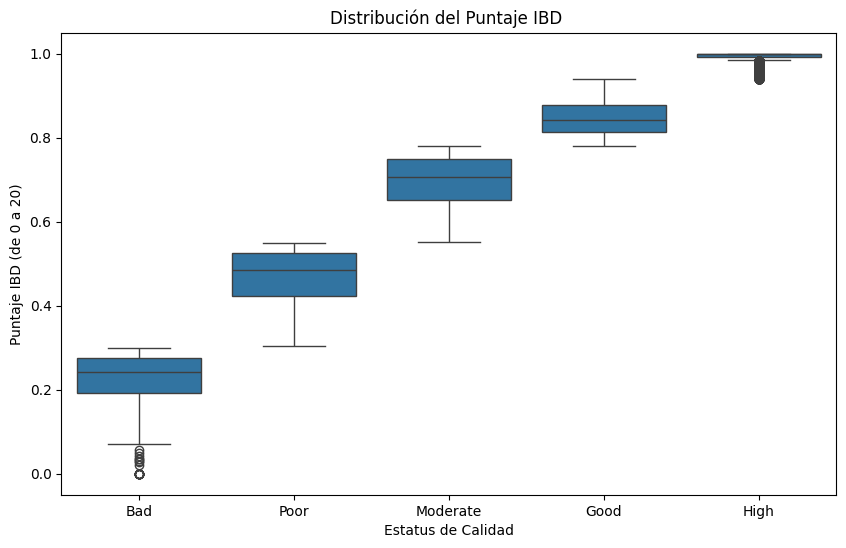

In [42]:
custom_order = ['Bad', 'Poor', 'Moderate', 'Good','High' ]


plt.figure(figsize=(10, 6))
sns.boxplot(
    x='IBD_EQR_Status',
    y='IBD_EQR',            
    data=train,
    order=custom_order 
)

plt.title('Distribución del Puntaje IBD ')
plt.ylabel('Puntaje IBD (de 0 a 20)')
plt.xlabel('Estatus de Calidad')
plt.show()

# Graficar con pandas:



La sintaxis base siempre es: `dataframe.plot(kind='tipo')`

Comparar Cantidades (Categorías)

  * **Barras Verticales (`'bar'`)**
      * **Uso:** Comparar conteos o valores entre grupos.
      * **Código:** `df['Categoria'].value_counts().plot(kind='bar')`


  * **Barras Horizontales (`'barh'`)**
      * **Uso:** Igual que el anterior, ideal si los nombres son largos.
      * **Código:** `df['Categoria'].value_counts().plot(kind='barh')`

  * **Pastel (`'pie'`)**
      * **Uso:** Ver proporciones o porcentajes de un total.
      * **Código:** `df['Categoria'].value_counts().plot(kind='pie')`

Relaciones y Tendencias (Numéricos)

  * **Línea (`'line'`)** *(Es el default)*
      * **Uso:** Ver cambios a lo largo del tiempo.
      * **Código:** `df.plot(kind='line', x='Fecha', y='Precio')`

  * **Dispersión (`'scatter'`)**
      * **Uso:** Ver si dos variables están relacionadas (correlación).
      * **Código:** `df.plot(kind='scatter', x='Metros', y='Precio')`

Estadística y Distribución

  * **Histograma (`'hist'`)**
      * **Uso:** Ver la frecuencia de los datos (¿Dónde se acumulan más?).
      * **Código:** `df['Precio'].plot(kind='hist', bins=20)`

  * **Caja y Bigotes (`'box'`)**
      * **Uso:** Ver medianas y detectar errores/valores extremos (outliers).
      * **Código:** `df.plot(kind='box', y='Precio')`



# Graficar con Seaborn:



### Gráfico de Barras (barplot)

* Uso: Muestra el promedio de una variable numérica por cada categoría (con una línea de error).

* Código: sns.barplot(data=df, x='Dia', y='Ventas')

### Conteo (countplot)

* Uso: Cuenta cuántas veces aparece cada categoría (igual que value_counts en gráfico).

* Código: sns.countplot(data=df, x='Categoria')

### Caja y Bigotes (boxplot)

* Uso: Ver medianas, cuartiles y outliers.

* Código: sns.boxplot(data=df, x='Categoria', y='Precio')


### Violín (violinplot)

* Uso: Como el boxplot, pero muestra la "forma" (densidad) de los datos.

* Código: sns.violinplot(data=df, x='Categoria', y='Precio')


### Línea (lineplot)

* Uso: Ver tendencias (idealmente series de tiempo). Seaborn calcula el promedio y el intervalo de confianza automáticamente si hay múltiples datos para un mismo punto x.

* Código: sns.lineplot(data=df, x='Fecha', y='Ventas')

### Distribuciones (Distribution Plots)

* Histograma (histplot)

* Uso: Ver la frecuencia de una sola variable numérica.

* Código: sns.histplot(data=df, x='Precio', kde=True) (kde=True agrega la curva suave).

### Curva de Densidad (kdeplot)

* Uso: Solo la curva suave de la distribución.

* Código: sns.kdeplot(data=df, x='Precio')

### Matrices y Correlación

* Mapa de Calor (heatmap)

* Uso: Ver matrices de confusión o correlaciones. Colorea una tabla según sus valores.

* Código: sns.heatmap(data=matriz_confusion, annot=True, cmap='Blues')

### Pares (pairplot)

* Uso: ¡El gráfico mágico! Hace un scatterplot de todas las variables numéricas contra todas las demás automáticamente.

* Código: sns.pairplot(data=df)

### Regresión Automática

* Regresión Lineal (regplot)

* Uso: Dibuja los puntos (scatter) Y la línea de regresión automáticamente.

* Código: sns.regplot(data=df, x='Metros', y='Precio')

Valor agregado:

Puedes agregar hue='Otra_Columna' a casi cualquier gráfico para colorear los datos automáticamente por una tercera variable.

Ejemplo: Un scatterplot de Metros vs Precio, coloreado por si tiene Piscina o no.

# Ejercicios

* Grafica usando el csv numero 01  (01_DiatomInventories_GTstudentproject_B.csv):L os tipos de taxones (10 mas comunes)

* Grafica por cantidad los tamaños de rios (Streamsize) usa el csv (02_InfoSites_GTstudentproject_B.csv)








